## Análise de um dataset de um supermercado

🛒 Descrição do Dataset: supermercado.csv
O dataset supermercado.csv reúne informações essenciais sobre transações realizadas em um supermercado, oferecendo uma base rica para análises de comportamento de consumo, desempenho de vendas e gestão operacional. Ele é ideal para estudos de inteligência de mercado, precificação, segmentação de clientes e otimização de estoque.
📊 Principais características:
- Período de coleta: Dados registrados ao longo de um intervalo temporal (diário, semanal ou mensal, dependendo da estrutura).
- Itens vendidos: Nome dos produtos, categorias, quantidade e preço unitário.
- Informações de venda: Data da compra, valor total da transação, forma de pagamento.
- Dados do cliente (se disponíveis): ID do cliente, faixa etária, gênero, fidelidade.
- Localização (se aplicável): Filial ou setor do supermercado onde a venda foi realizada.
🎯 Possibilidades de análise:
- Tendências de consumo por período ou categoria de produto.
- Produtos com maior e menor giro.
- Análise de ticket médio por cliente ou por dia.
- Identificação de padrõe dessas ideias?


🛒 Descrição do Dataset: supermercado.csv
O dataset supermercado.csv contém registros detalhados de transações realizadas em diferentes filiais de um supermercado, oferecendo uma base robusta para análises comerciais, operacionais e de comportamento do consumidor.
📁 Estrutura das Colunas:
| Coluna | Descrição | 
| ID_Transacao | Identificador único de cada compra realizada. | 
| Data | Data em que a transação ocorreu. | 
| Hora | Horário exato da compra. | 
| Filial | Loja onde a compra foi feita (São Luís, Imperatriz, Teresina, Belém). | 
| Tipo_Cliente | Classificação do cliente: Membro ou Normal. | 
| Forma_Pagamento | Método utilizado para pagamento (ex: Dinheiro, Cartão, Pix). | 
| Produto | Nome do item comprado. | 
| Categoria | Categoria do produto (ex: Alimentos, Higiene, Bebidas). | 
| Preco_Unitario | Valor por unidade do produto. | 
| Quantidade | Número de unidades adquiridas. | 
| Custo | Valor total dos itens comprados (Preço Unitário × Quantidade). | 
| Imposto_ICMS | Imposto aplicado sobre o custo (18%). | 
| Total | Valor final da compra, incluindo o imposto. | 
| Avaliacao_Cliente | Nota de satisfação dada pelo cliente (escala de 1 a 10). | 





## Importação da Biblioteca

In [1]:
import pandas as pd

In [2]:
df_supermercado = pd.read_csv('supermercado.csv')

In [3]:
df_supermercado

,ID_Transacao,Data,Hora,Filial,Tipo_Cliente,Forma_Pagamento,Produto,Categoria,Preco_Unitario,Quantidade,Custo,Imposto_ICMS,Total,Avaliacao_Cliente
0,TR001,01/01/2024,10:15,São Luís,Normal,Cartão de Débito,Arroz,Alimentos,5.50,2,11.00,1.98,12.98,8
1,TR002,01/01/2024,11:30,Imperatriz,Membro,Cartão de Crédito,Sabonete,Higiene,3.25,4,13.00,2.34,15.34,9
2,TR003,01/01/2024,12:00,Teresina,Normal,Dinheiro,Cerveja,Bebidas,4.50,6,27.00,4.86,31.86,7
3,TR004,01/01/2024,13:45,Belém,Membro,Cartão de Crédito,Detergente,Limpeza,2.75,3,8.25,1.49,9.74,10
4,TR005,01/01/2024,14:20,São Luís,Normal,Dinheiro,Leite,Alimentos,4.00,1,4.00,0.72,4.72,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,TR496,19/02/2024,14:15,Belém,Membro,Dinheiro,Ovo,Alimentos,1.20,12,14.40,2.59,16.99,10
496,TR497,19/02/2024,15:55,São Luís,Normal,Cartão de Débito,Macarrão,Alimentos,3.75,3,11.25,2.03,13.28,7
497,TR498,19/02/2024,16:30,Imperatriz,Membro,Cartão de Crédito,Arroz,Alimentos,5.50,4,22.00,3.96,25.96,9
498,TR499,19/02/2024,17:15,Teresina,Normal,Dinheiro,Detergente,Limpeza,2.75,2,5.50,0.99,6.49,8


## Análises de vendas por filial 📊

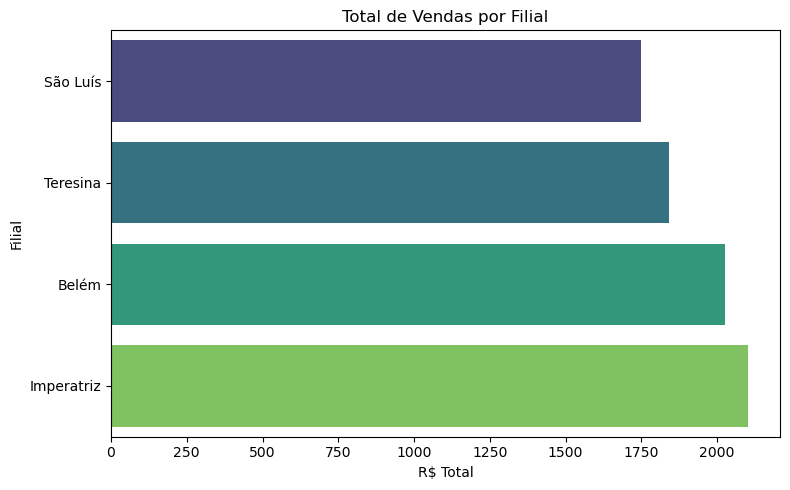

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total de vendas por filial
vendas_filial = df_supermercado.groupby('Filial')['Total'].sum().sort_values()

# Gráfico
plt.figure(figsize=(8,5))
sns.barplot(x=vendas_filial.values, y=vendas_filial.index, palette='viridis')
plt.title("Total de Vendas por Filial")
plt.xlabel("R$ Total")
plt.ylabel("Filial")
plt.tight_layout()
plt.show()

## Avaliação média por tipo de cliente 📈

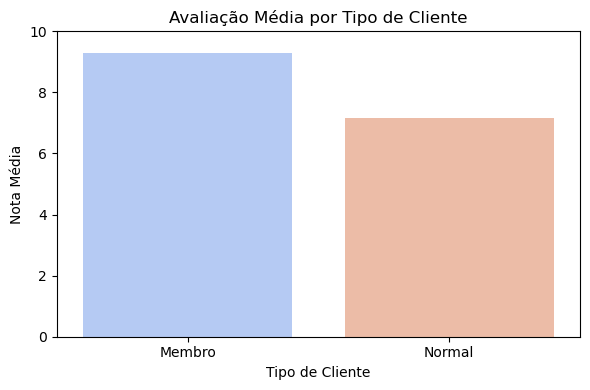

In [6]:
avaliacao_media = df_supermercado.groupby('Tipo_Cliente')['Avaliacao_Cliente'].mean()

# Gráfico
plt.figure(figsize=(6,4))
sns.barplot(x=avaliacao_media.index, y=avaliacao_media.values, palette='coolwarm')
plt.title("Avaliação Média por Tipo de Cliente")
plt.ylabel("Nota Média")
plt.xlabel("Tipo de Cliente")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

## Produtos mais vendidos 💡

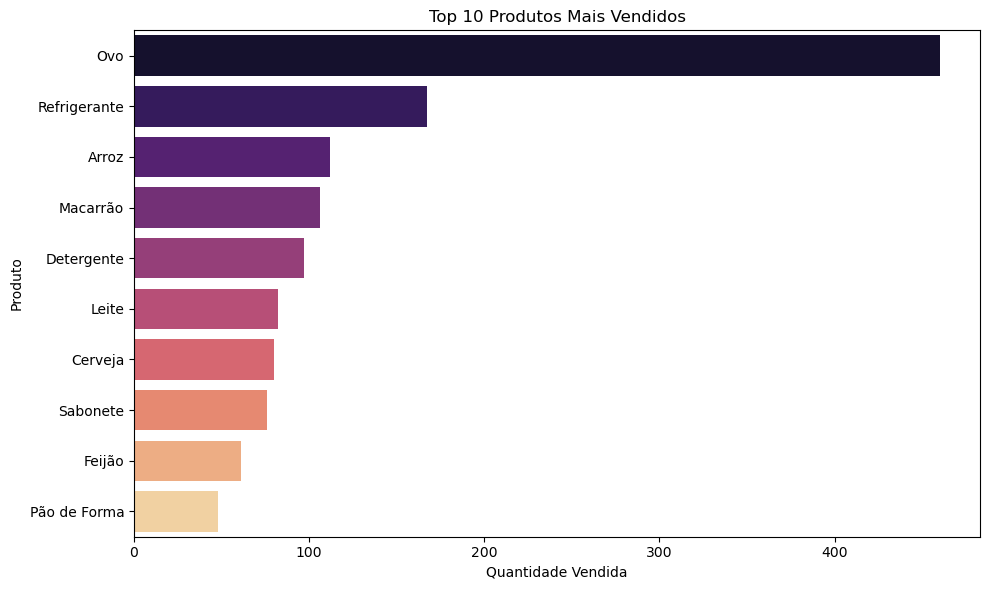

In [7]:
produtos_top = df_supermercado.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=produtos_top.values, y=produtos_top.index, palette='magma')
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()

## Desempenho por filial 🏬

In [8]:
# Receita total por filial
receita_por_filial = df_supermercado.groupby('Filial')['Total'].sum().sort_values(ascending=False)

# Avaliação média por filial
avaliacao_por_filial = df_supermercado.groupby('Filial')['Avaliacao_Cliente'].mean()

In [9]:
receita_por_filial

Filial
Imperatriz    2102.41
Belém         2027.17
Teresina      1841.07
São Luís      1748.71
Name: Total, dtype: float64

In [10]:
avaliacao_por_filial

Filial
Belém         8.632
Imperatriz    8.632
São Luís      7.984
Teresina      7.600
Name: Avaliacao_Cliente, dtype: float64

## Vendas por hora e dias da semana ⏰

In [14]:
# Criar coluna de hora em formato inteiro
df_supermercado['Hora_Int'] = pd.to_datetime(df_supermercado['Hora'], format='%H:%M').dt.hour

# Vendas por hora
vendas_por_hora = df_supermercado.groupby('Hora_Int')['Total'].sum()

# Vendas por dia da semana
vendas_por_dia = df_supermercado.groupby('Data')['Total'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

In [15]:
vendas_por_hora

Hora_Int
9     723.71
10    743.37
11    727.73
12    807.61
13    737.39
14    802.89
15    683.13
16    917.22
17    675.93
18    893.30
19      7.08
Name: Total, dtype: float64

In [16]:
vendas_por_dia

Data
Monday      NaN
Tuesday     NaN
Wednesday   NaN
Thursday    NaN
Friday      NaN
Saturday    NaN
Sunday      NaN
Name: Total, dtype: float64

## Comparação entre clientes membros e normais 👥

In [17]:
# Total gasto por tipo de cliente
gasto_por_tipo = df_supermercado.groupby('Tipo_Cliente')['Total'].sum()

# Quantidade média comprada
quantidade_media = df_supermercado.groupby('Tipo_Cliente')['Quantidade'].mean()

# Avaliação média
avaliacao_media = df_supermercado.groupby('Tipo_Cliente')['Avaliacao_Cliente'].mean()

In [18]:
gasto_por_tipo

Tipo_Cliente
Membro    3956.17
Normal    3763.19
Name: Total, dtype: float64

In [19]:
quantidade_media

Tipo_Cliente
Membro    3.300813
Normal    2.728346
Name: Quantidade, dtype: float64

In [20]:
avaliacao_media

Tipo_Cliente
Membro    9.284553
Normal    7.173228
Name: Avaliacao_Cliente, dtype: float64

## Categorias mais lucrativas 📦

In [21]:
# Receita por categoria
receita_categoria = df_supermercado.groupby('Categoria')['Total'].sum().sort_values(ascending=False)

# Margem tributária por categoria
imposto_por_categoria = df_supermercado.groupby('Categoria')['Imposto_ICMS'].sum()

In [22]:
receita_categoria

Categoria
Alimentos            4398.21
Bebidas              1465.56
Limpeza               907.30
Higiene               640.31
Eletrônicos           177.00
Casa & Utensílios     130.98
Name: Total, dtype: float64

In [23]:
imposto_por_categoria

Categoria
Alimentos            671.01
Bebidas              223.56
Casa & Utensílios     19.98
Eletrônicos           27.00
Higiene               97.71
Limpeza              138.45
Name: Imposto_ICMS, dtype: float64

## Impacto do imposto ICMS 💰

In [24]:
# Total de imposto recolhido
total_imposto = df_supermercado['Imposto_ICMS'].sum()

# Percentual do imposto sobre a receita
percentual_imposto = (total_imposto / df_supermercado['Total'].sum()) * 100

In [25]:
total_imposto

1177.71

In [26]:
percentual_imposto

15.25657567466733

## ICMS total por filial 🧾

In [30]:
df_supermercado.groupby('Filial')['Imposto_ICMS'].sum()

Filial
Belém         309.27
Imperatriz    320.76
São Luís      266.81
Teresina      280.87
Name: Imposto_ICMS, dtype: float64

## Avaliação média por filial 📈

In [34]:
df_supermercado.groupby('Filial')['Avaliacao_Cliente'].mean().sort_values()

Filial
Teresina      7.600
São Luís      7.984
Belém         8.632
Imperatriz    8.632
Name: Avaliacao_Cliente, dtype: float64

## Preferência de método de pagamento 💳

In [36]:
df_supermercado['Forma_Pagamento'].value_counts()

Forma_Pagamento
Dinheiro             175
Cartão de Crédito    166
Cartão de Débito     159
Name: count, dtype: int64

## Ticket médio por transação 🧮

In [37]:
ticket_medio = df_supermercado['Total'].mean()
print(f'Ticket médio: R$ {ticket_medio:.2f}')

Ticket médio: R$ 15.44


## Produtos com maior receitas total 📌

In [38]:
df_supermercado.groupby('Produto')['Total'].sum().sort_values(ascending=False).head(10)

Produto
Carne           1209.50
Arroz            726.88
Ovo              651.32
Refrigerante     591.18
Sabão em Pó      548.70
Macarrão         469.16
Feijão           446.32
Cerveja          424.80
Leite            387.04
Pão de Forma     339.84
Name: Total, dtype: float64

## Margem de imposto por produto 📊

In [39]:
df_supermercado['Margem_Imposto'] = df_supermercado['Imposto_ICMS'] / df_supermercado['Custo']
df_supermercado.groupby('Produto')['Margem_Imposto'].mean().sort_values(ascending=False).head(10)

Produto
Fio Dental         0.180423
Macarrão           0.180257
Detergente         0.180255
Feijão             0.180252
Sabonete           0.180147
Pão de Forma       0.180000
Refrigerante       0.180000
Frango             0.180000
Esponja            0.180000
Papel Higiênico    0.180000
Name: Margem_Imposto, dtype: float64

## Quantidade média vendida por categoria 🧮

In [41]:
df_supermercado.groupby('Categoria')['Quantidade'].mean().sort_values(ascending=False)

Categoria
Casa & Utensílios    4.000000
Bebidas              3.835443
Alimentos            3.240418
Limpeza              2.106061
Higiene              1.841270
Eletrônicos          1.000000
Name: Quantidade, dtype: float64

## Distribuição de avaliações dos clientes 🧍‍♀️

<Axes: title={'center': 'Distribuição de Avaliações'}, xlabel='Avaliacao_Cliente'>

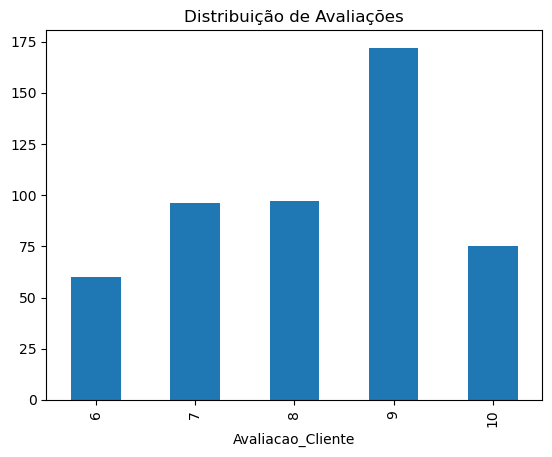

In [42]:
df_supermercado['Avaliacao_Cliente'].value_counts().sort_index().plot(kind='bar', title='Distribuição de Avaliações')

## Receita por forma de pagamento 💳

In [43]:
df_supermercado.groupby('Forma_Pagamento')['Total'].sum().sort_values(ascending=False)

Forma_Pagamento
Cartão de Crédito    2696.91
Dinheiro             2590.93
Cartão de Débito     2431.52
Name: Total, dtype: float64

## Produtos com avaliações médias mais altas 🕵️‍♂️

In [44]:
df_supermercado.groupby('Produto')['Avaliacao_Cliente'].mean().sort_values(ascending=False).head(10)

Produto
Água Mineral       9.500000
Desinfetante       9.000000
Suco               8.666667
Papel Higiênico    8.666667
Cerveja            8.642857
Frutas             8.500000
Sabonete           8.500000
Panela             8.500000
Refrigerante       8.435897
Ovo                8.404762
Name: Avaliacao_Cliente, dtype: float64

## Custo total por categoria 🧾

In [47]:
df_supermercado.groupby('Categoria')['Custo'].sum().sort_values(ascending=False)

Categoria
Alimentos            3727.20
Bebidas              1242.00
Limpeza               768.85
Higiene               542.60
Eletrônicos           150.00
Casa & Utensílios     111.00
Name: Custo, dtype: float64

## Produtos com baixa venda e baixa avaliação 📉

In [49]:
produto_analise = df_supermercado.groupby('Produto').agg({
    'Quantidade': 'sum',
    'Avaliacao_Cliente': 'mean'
})
produto_analise[(produto_analise['Quantidade'] < 50) & (produto_analise['Avaliacao_Cliente'] < 5)].sort_values(by='Quantidade')

,Quantidade,Avaliacao_Cliente
Produto,,


In [50]:
produto_analise

,Quantidade,Avaliacao_Cliente
Produto,,
Amaciante,2,6.500000
Arroz,112,7.869565
Açúcar,11,7.500000
Batedeira,1,8.000000
Café,16,8.375000
Carne,41,8.294118
Cerveja,80,8.642857
Copo,6,8.000000
Creme Dental,3,8.000000


## Comparação de receita por tipo de cliente e forma de pagamento 📊

In [51]:
df_supermercado.groupby(['Tipo_Cliente', 'Forma_Pagamento'])['Total'].sum().unstack().fillna(0)

Forma_Pagamento,Cartão de Crédito,Cartão de Débito,Dinheiro
Tipo_Cliente,,,
Membro,1911.71,577.62,1466.84
Normal,785.20,1853.90,1124.09


## Adiciona a coluna de valor total 

In [65]:
# Adiciona a coluna de valor total
df_supermercado['Valor_Total'] = df_supermercado['Quantidade'] * df_supermercado['Preco_Unitario']

In [66]:
df_supermercado.head(16)

,ID_Transacao,Data,Hora,Filial,Tipo_Cliente,Forma_Pagamento,Produto,Categoria,Preco_Unitario,Quantidade,Custo,Imposto_ICMS,Total,Avaliacao_Cliente,Hora_Int,Margem_Imposto,valor_total,Valor_Total
0,TR001,01/01/2024,10,São Luís,Normal,Cartão de Débito,Arroz,Alimentos,5.50,2,11.00,1.98,12.98,8,10,0.180000,11.00,11.00
1,TR002,01/01/2024,11,Imperatriz,Membro,Cartão de Crédito,Sabonete,Higiene,3.25,4,13.00,2.34,15.34,9,11,0.180000,13.00,13.00
2,TR003,01/01/2024,12,Teresina,Normal,Dinheiro,Cerveja,Bebidas,4.50,6,27.00,4.86,31.86,7,12,0.180000,27.00,27.00
3,TR004,01/01/2024,13,Belém,Membro,Cartão de Crédito,Detergente,Limpeza,2.75,3,8.25,1.49,9.74,10,13,0.180606,8.25,8.25
4,TR005,01/01/2024,14,São Luís,Normal,Dinheiro,Leite,Alimentos,4.00,1,4.00,0.72,4.72,6,14,0.180000,4.00,4.00
5,TR006,01/01/2024,15,Imperatriz,Normal,Cartão de Débito,Shampoo,Higiene,8.50,1,8.50,1.53,10.03,8,15,0.180000,8.50,8.50
6,TR007,01/01/2024,16,Teresina,Membro,Cartão de Crédito,Refrigerante,Bebidas,3.00,5,15.00,2.70,17.70,9,16,0.180000,15.00,15.00
7,TR008,01/01/2024,17,Belém,Normal,Dinheiro,Esponja,Limpeza,1.50,2,3.00,0.54,3.54,7,17,0.180000,3.00,3.00
8,TR009,01/01/2024,18,São Luís,Membro,Cartão de Débito,Macarrão,Alimentos,3.75,3,11.25,2.03,13.28,9,18,0.180444,11.25,11.25
9,TR010,01/01/2024,19,Imperatriz,Normal,Cartão de Crédito,Pão de Forma,Alimentos,6.00,1,6.00,1.08,7.08,6,19,0.180000,6.00,6.00


## Calculos por produtos 📦

In [67]:
# Agrupamento por produto
produto_stats = df_supermercado.groupby('Produto').agg({
    'Quantidade': 'sum',                # Total de unidades vendidas
    'Valor_Total': 'sum',               # Receita bruta por produto
    'Avaliacao_Cliente': 'mean',        # Avaliação média
    'Imposto_ICMS': 'sum',              # Total de imposto recolhido
    'Total': 'sum'                      # Receita final (com imposto)
}).sort_values(by='Valor_Total', ascending=False)

In [68]:
produto_stats

,Quantidade,Valor_Total,Avaliacao_Cliente,Imposto_ICMS,Total
Produto,,,,,
Carne,41,1025.00,8.294118,184.50,1209.50
Arroz,112,616.00,7.869565,110.88,726.88
Ovo,460,552.00,8.404762,99.32,651.32
Refrigerante,167,501.00,8.435897,90.18,591.18
Sabão em Pó,31,465.00,7.900000,83.70,548.70
Macarrão,106,397.50,8.131579,71.66,469.16
Feijão,61,378.20,8.024390,68.12,446.32
Cerveja,80,360.00,8.642857,64.80,424.80
Leite,82,328.00,8.384615,59.04,387.04


## Exibir os tops produtos 📊

In [69]:
# Top 10 produtos mais lucrativos
top_produtos = produto_stats.head(10)
print(top_produtos)

              Quantidade  Valor_Total  Avaliacao_Cliente  Imposto_ICMS  \
Produto                                                                  
Carne                 41       1025.0           8.294118        184.50   
Arroz                112        616.0           7.869565        110.88   
Ovo                  460        552.0           8.404762         99.32   
Refrigerante         167        501.0           8.435897         90.18   
Sabão em Pó           31        465.0           7.900000         83.70   
Macarrão             106        397.5           8.131579         71.66   
Feijão                61        378.2           8.024390         68.12   
Cerveja               80        360.0           8.642857         64.80   
Leite                 82        328.0           8.384615         59.04   
Pão de Forma          48        288.0           8.228571         51.84   

                Total  
Produto                
Carne         1209.50  
Arroz          726.88  
Ovo            

## Vizualização com gráficos dos 10 top 📈

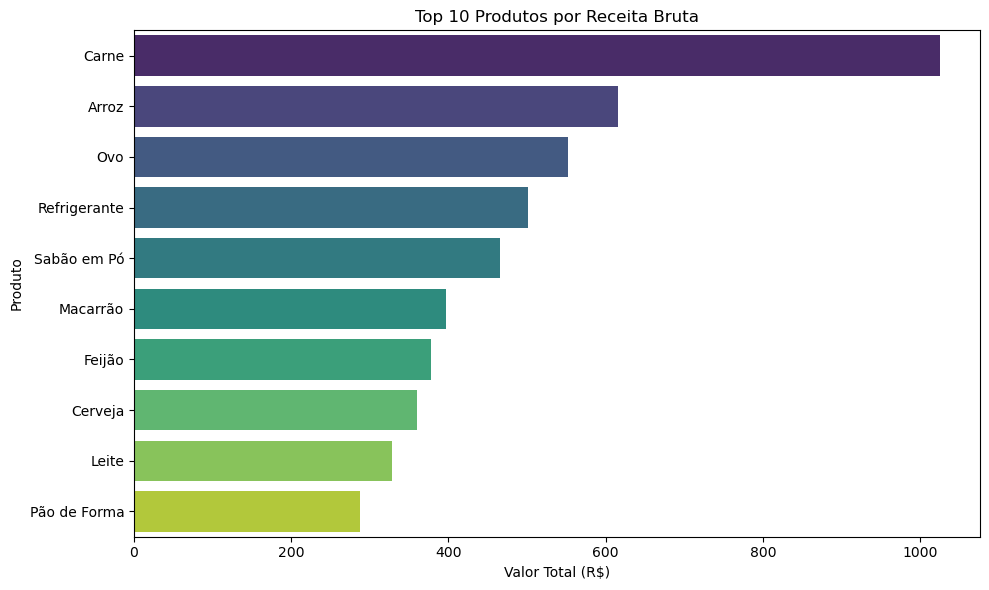

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_produtos['Valor_Total'], y=top_produtos.index, palette='viridis')
plt.title("Top 10 Produtos por Receita Bruta")
plt.xlabel("Valor Total (R$)")
plt.ylabel("Produto")
plt.tight_layout()
plt.show()